<a href="https://colab.research.google.com/github/drscook/m5364_23sp_data_science1/blob/main/CEE_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# run once at start of session
# ignore "pip dependency" error
# upgrade to most recent versions (Pandas 2.0 released on April 6, 2023)
! pip install -q --upgrade numpy pandas scikit-learn
# restart kernel so upgrade takes effect
from IPython import get_ipython
get_ipython().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

1. Numpy - https://numpy.org/ - Foundational scientific computing package (arrays)
1. Pandas - https://pandas.pydata.org/ - Most important data science package (dataframes)
1. Scikit-Learn - https://scikit-learn.org - Machine Learning
1. Jupyter Notebook - https://jupyter.org/ - Front end user interface you are using now
1. Google Colab - https://colab.research.google.com/ - Cloud compute platform you are using now





Colab borrows a machine from Google for you.  But Google wants it back when you are done.
- This Jupyter notebook automatically saves to your Google Drive (folder "Colab Notebook)
- Any other files you upload or create will be deleted unless you save to your google drive
  - click the folder icon in far left column beneath {x}
  - click folder with triangle (hover says "Mount Drive")
  - grant permissions in pop-ups
  - "drive" appears in list
  - drive/MyDrive is permanent storage in your drive
  - right-click MyDrive & create new folder named CEE_workshop
  - hover & click the 3 vertical dots - copy path - paste below if different


In [1]:
import pathlib, pandas as pd
path = pathlib.Path("/content/drive/MyDrive/CEE_workshop")  # replace with your path if different; enclose in quotation marks
file = path / "airbnb.csv"

We will use the Boston Airbnb dataset from OpenML.org https://www.openml.org/search?type=data&status=active&id=43819

In [9]:
from sklearn.datasets import fetch_openml
airbnb = fetch_openml(data_id=43819, parser="auto")
airbnb.data.to_csv(file, index=False)  # saves to your drive
airbnb.data.head(3)

,id,name,summary,access,interaction,house_rules,host_id,host_since,host_location,host_response_time,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,3781,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",4804,2008-12-03,Massachusetts,within a few hours,...,10.0,10.0,10.0,10.0,t,NaN,f,f,super_strict_30,0.28
1,5506,**49 Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,8229,2009-02-19,"Boston, Massachusetts, United States",within an hour,...,10.0,10.0,9.0,10.0,t,Exempt: This listing is a unit that has contra...,t,f,strict_14_with_grace_period,0.79
2,6695,99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Full Private apartment. 1 bedroom, kitchen, ...",NaN,No Smoking in the Building.,8229,2009-02-19,"Boston, Massachusetts, United States",within an hour,...,10.0,10.0,9.0,10.0,t,STR-404620,t,f,strict_14_with_grace_period,0.88


If you start with a csv, simply put it google drive and read it in like this.

In [3]:
df = pd.read_csv(file)
df.head(3)

,Unnamed: 0,id,name,summary,access,interaction,house_rules,host_id,host_since,host_location,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,0,3781,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",4804,2008-12-03,Massachusetts,...,10.0,10.0,10.0,10.0,t,NaN,f,f,super_strict_30,0.28
1,1,5506,**49 Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,8229,2009-02-19,"Boston, Massachusetts, United States",...,10.0,10.0,9.0,10.0,t,Exempt: This listing is a unit that has contra...,t,f,strict_14_with_grace_period,0.79
2,2,6695,99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Full Private apartment. 1 bedroom, kitchen, ...",NaN,No Smoking in the Building.,8229,2009-02-19,"Boston, Massachusetts, United States",...,10.0,10.0,9.0,10.0,t,STR-404620,t,f,strict_14_with_grace_period,0.88


Start analysis

In [1]:
import pathlib, numpy as np, pandas as pd, sklearn, missingno as msno
# pretty output of dataframes
from google.colab import data_table
data_table.enable_dataframe_formatter()

# ask scikit-learn to output pandas dataframes rather than numpy arrays
from sklearn import set_config
set_config(transform_output = "pandas")

# little helper to easily show the first 3 lines as we progress through data wrangling
def disp(X):
    display(X.head(3))

path = pathlib.Path("/content/drive/MyDrive/CEE_workshop")  # replace with your path if different; enclose in quotation marks
file = path / "airbnb.csv"
df = pd.read_csv(file).convert_dtypes()  # convert_dtypes activate new "nullable" datatypes in pandas https://pandas.pydata.org/pandas-docs/version/1.1/user_guide/integer_na.html
disp(df)


,id,name,summary,access,interaction,house_rules,host_id,host_since,host_location,host_response_time,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,3781,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",4804,2008-12-03,Massachusetts,within a few hours,...,10,10,10,10,t,<NA>,f,f,super_strict_30,0.28
1,5506,**49 Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,8229,2009-02-19,"Boston, Massachusetts, United States",within an hour,...,10,10,9,10,t,Exempt: This listing is a unit that has contra...,t,f,strict_14_with_grace_period,0.79
2,6695,99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Full Private apartment. 1 bedroom, kitchen, ...",<NA>,No Smoking in the Building.,8229,2009-02-19,"Boston, Massachusetts, United States",within an hour,...,10,10,9,10,t,STR-404620,t,f,strict_14_with_grace_period,0.88


Projects usually start with a lot of data exploration and visualization so you can make informed choices about data wrangling and modeling approaches. For the sake of time in this workshop, we assume this was already done and skip to wrangling and modeling.

Task: Predict "review_scores_value".  This is the overall rating for an airbnb property and combines the other "review_scores_X" columns.  So, we can't use those columns as input (feature) - that would be cheating.

In [2]:
# force all strings to lower case
# Python folks prefer a the "easier to ask forgivenes than permission" style over "look before you leap"
# Some columns are not strings. We'll simply try to lower case everything and fail gracefully for non-strings.
for col in df.columns:
    try:
        df[col] = df[col].str.lower()
    except AttributeError:
        pass
disp(df)

# price has entries like "6,000.00". The comma forces this to be a string rather than float.  Let's fix that
df['price'] = df['price'].str.replace(',','').astype(float)

# house_rules is free-form text.  Let's try to deterimine if pets and smoking are allowed
# We guess that pets are allowed unless "no pets" appears in house_rules. This will miss other
# expressions like "pets are not allowed".
df['pets_ok'] = ~df['house_rules'].str.contains('no pets')

# During data exploration, we observed anytime smoking was discussed in house_rules, it was prohibited.
# In other words, we did not see explicit permission to smoke.
# So, we'll crudely assume that smoking is prohibited anytime "smok" appears in house_rules
df['smoking_ok'] = ~df['house_rules'].str.contains('smok')

# If we wanted to be more careful, we could search for multiple expressions like this:
# df['smoking_ok'] = ~df['house_rules'].str.contains('|'.join(['smoking', 'non smoking', 'non-smoking', 'smoking not permitted', 'smoking is not permitted']))
# https://stackoverflow.com/questions/48541444/pandas-filtering-for-multiple-substrings-in-series/48600345#48600345

,id,name,summary,access,interaction,house_rules,host_id,host_since,host_location,host_response_time,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,3781,harborside-walk to subway,fully separate apartment in a two apartment bu...,guests solely occupy the 1 floor apartment wit...,we sometimes travel. always available via: mob...,"no pets, no smoking.",4804,2008-12-03,massachusetts,within a few hours,...,10,10,10,10,t,<NA>,f,f,super_strict_30,0.28
1,5506,**49 special ** private! minutes to center!,"private guest room with private bath, you do n...",you get full access to the guest room with pri...,"we give guests privacy, but we are available ...",no smoking in the building.,8229,2009-02-19,"boston, massachusetts, united states",within an hour,...,10,10,9,10,t,exempt: this listing is a unit that has contra...,t,f,strict_14_with_grace_period,0.79
2,6695,99 special!! home away! condo,"comfortable, fully equipped private apartment...","full private apartment. 1 bedroom, kitchen, ...",<NA>,no smoking in the building.,8229,2009-02-19,"boston, massachusetts, united states",within an hour,...,10,10,9,10,t,str-404620,t,f,strict_14_with_grace_period,0.88


<Axes: >

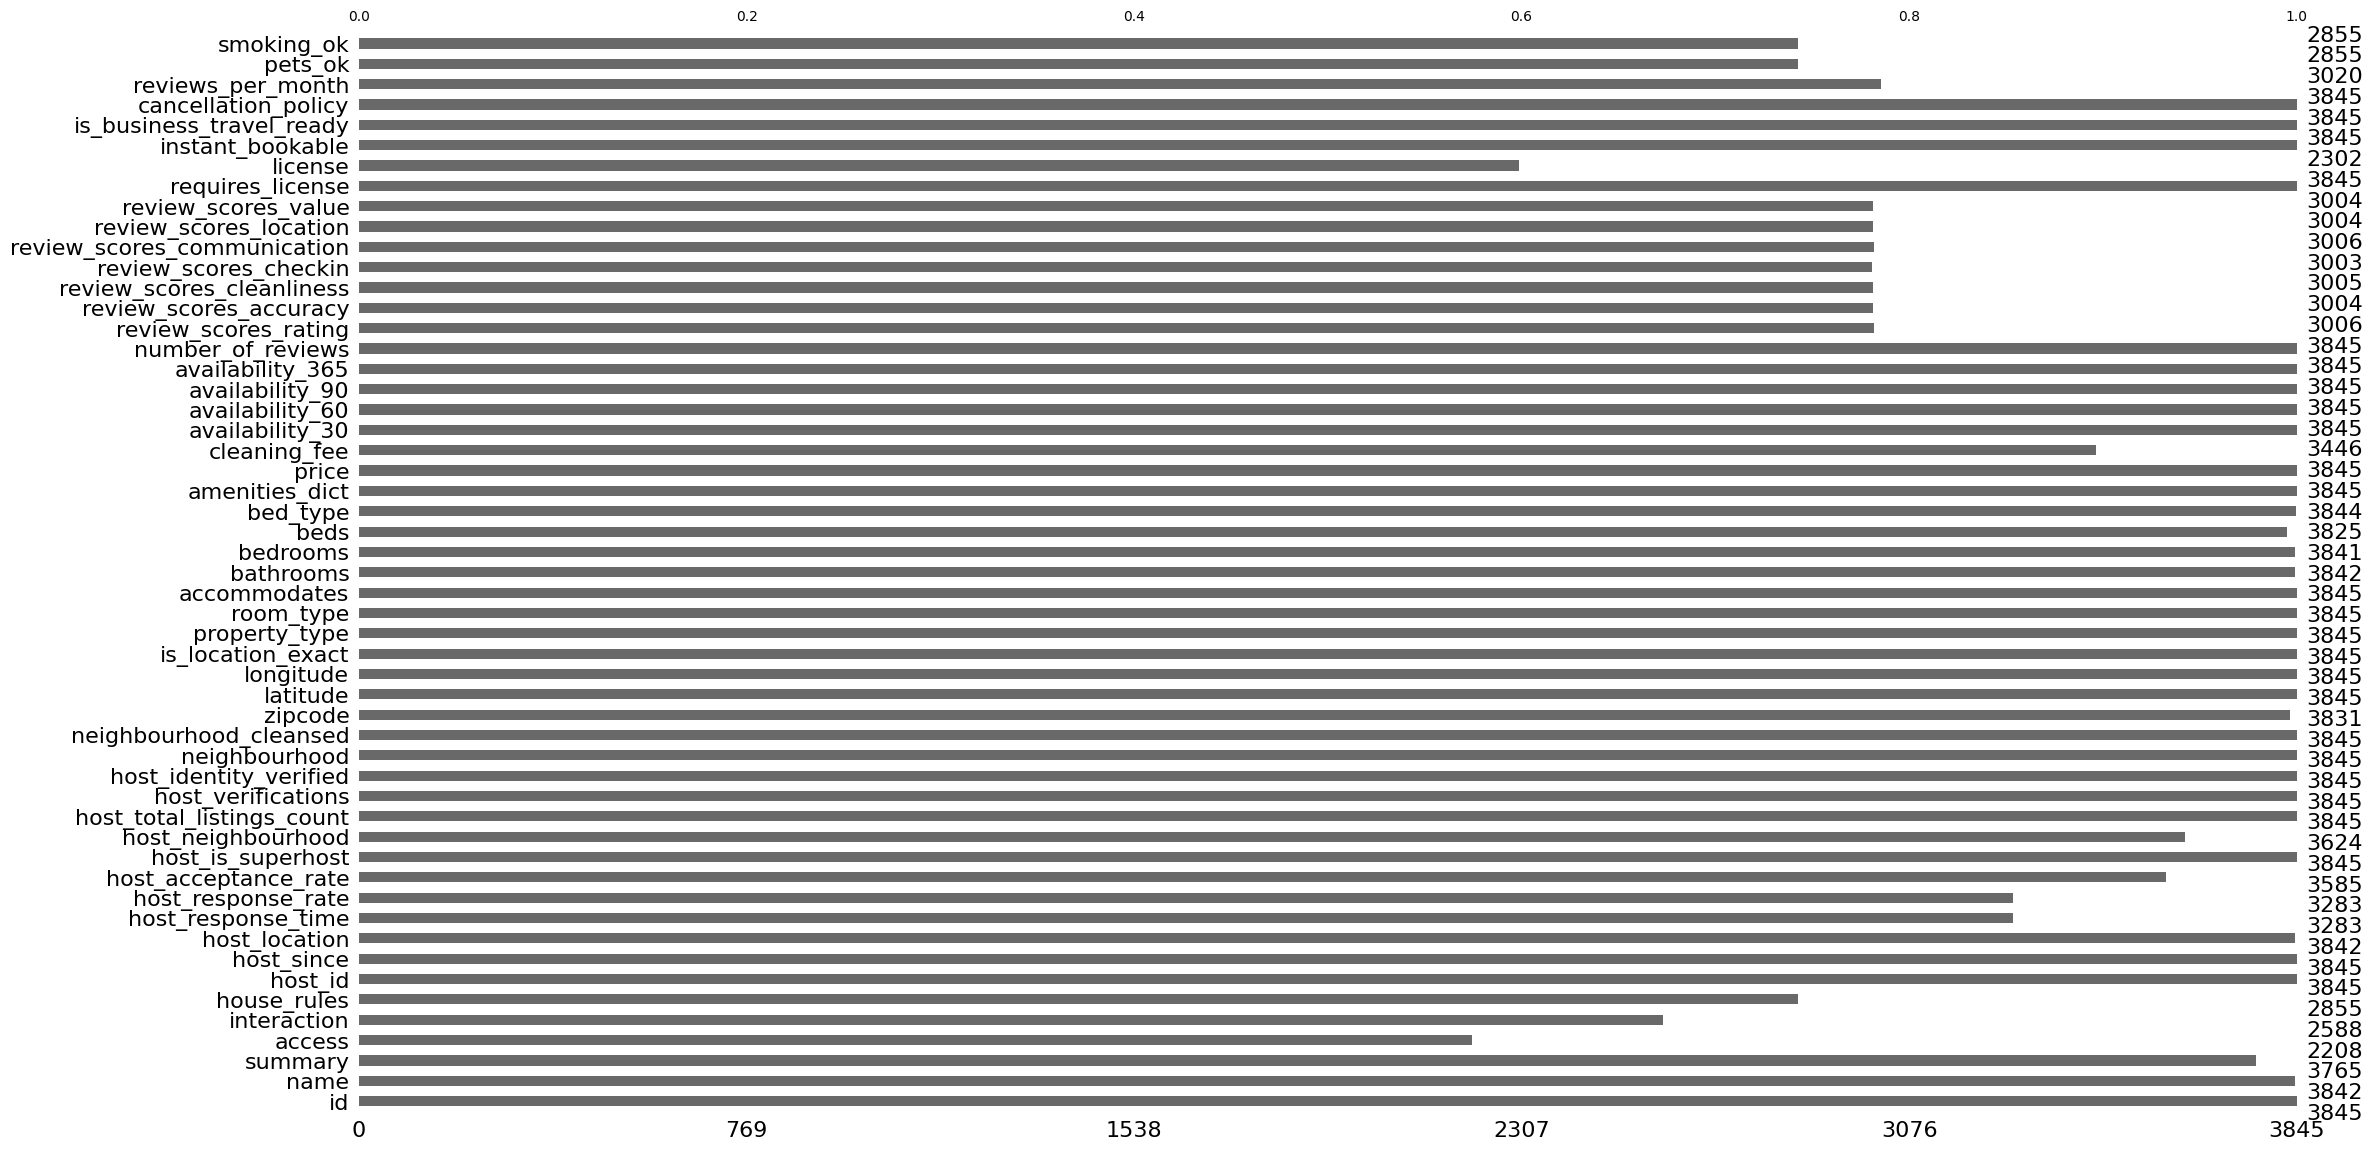

In [3]:
# Missing data count in each columns
msno.bar(df)

<Axes: >

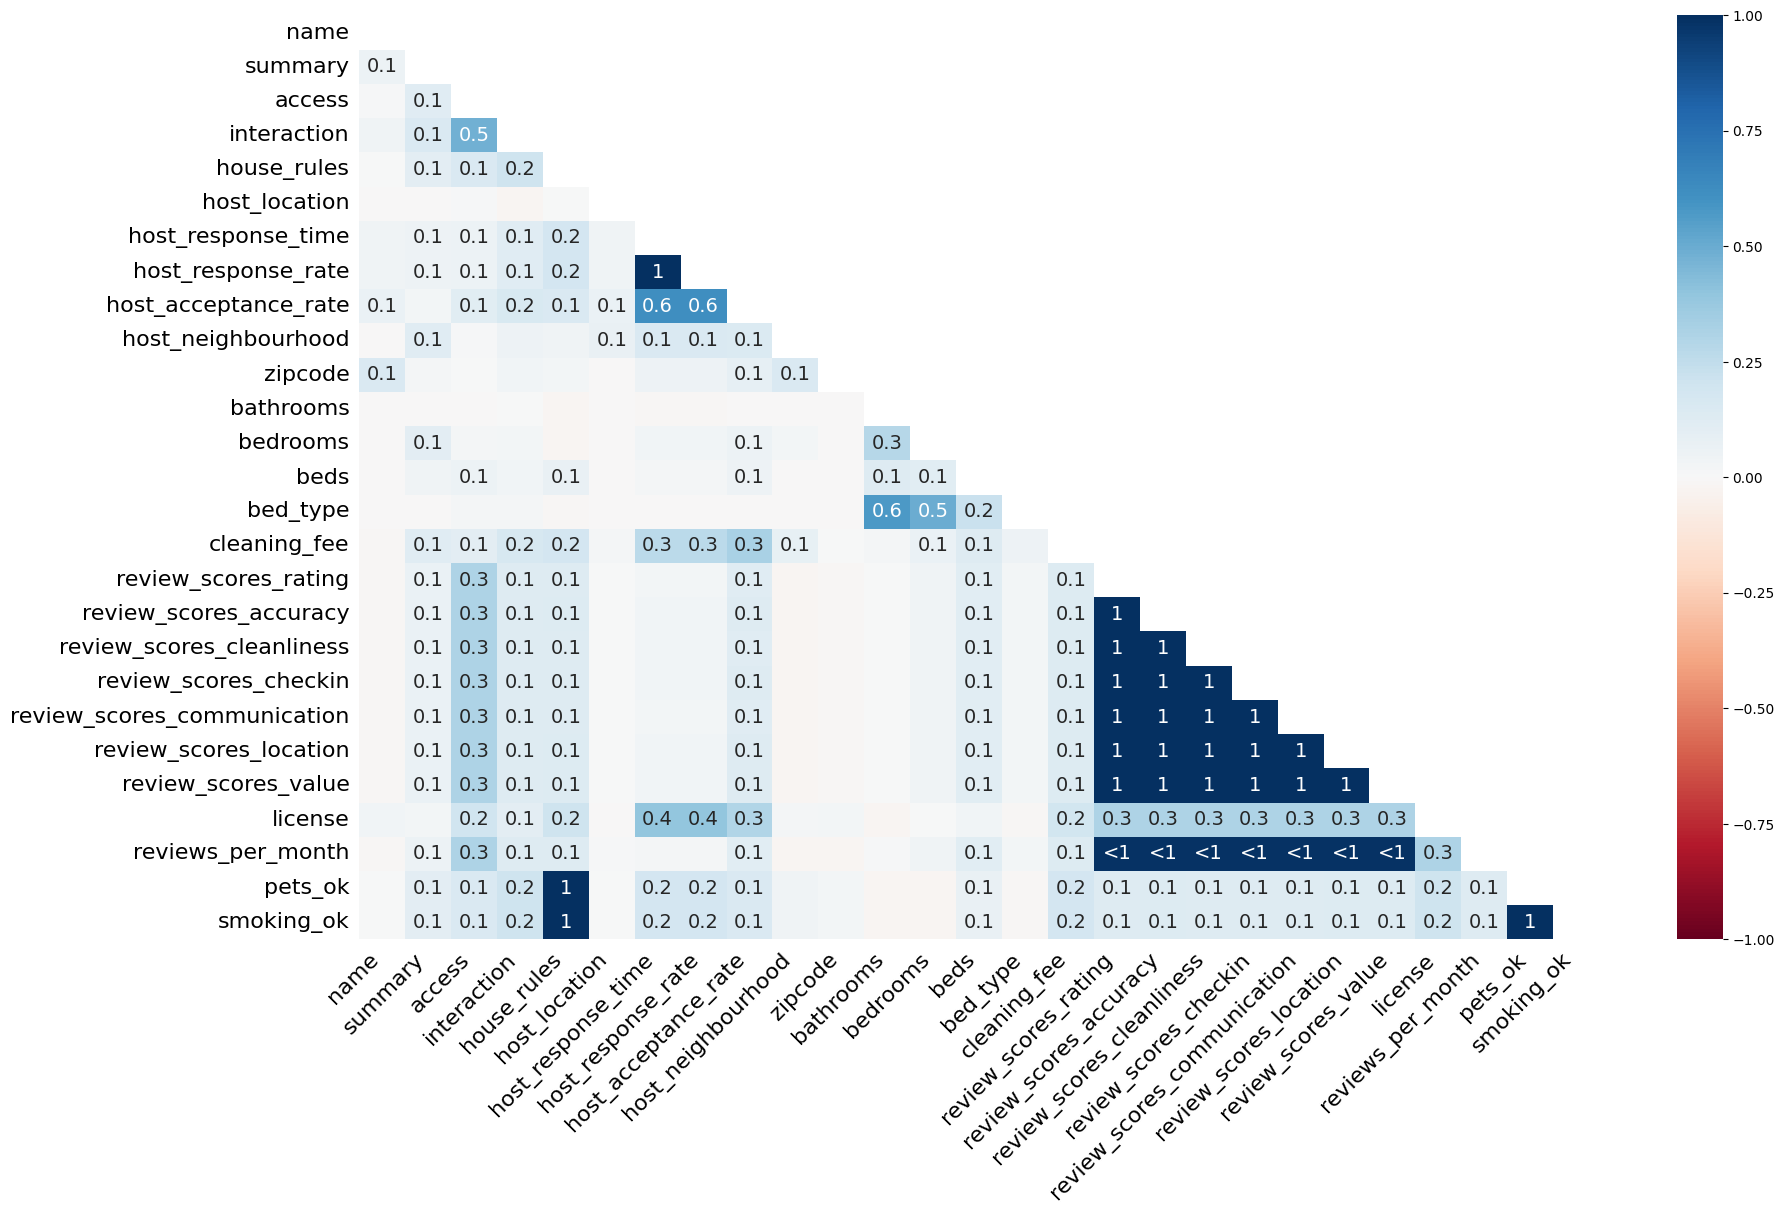

In [4]:
# Correlation of missing data in column pairs
msno.heatmap(df)

<Axes: >

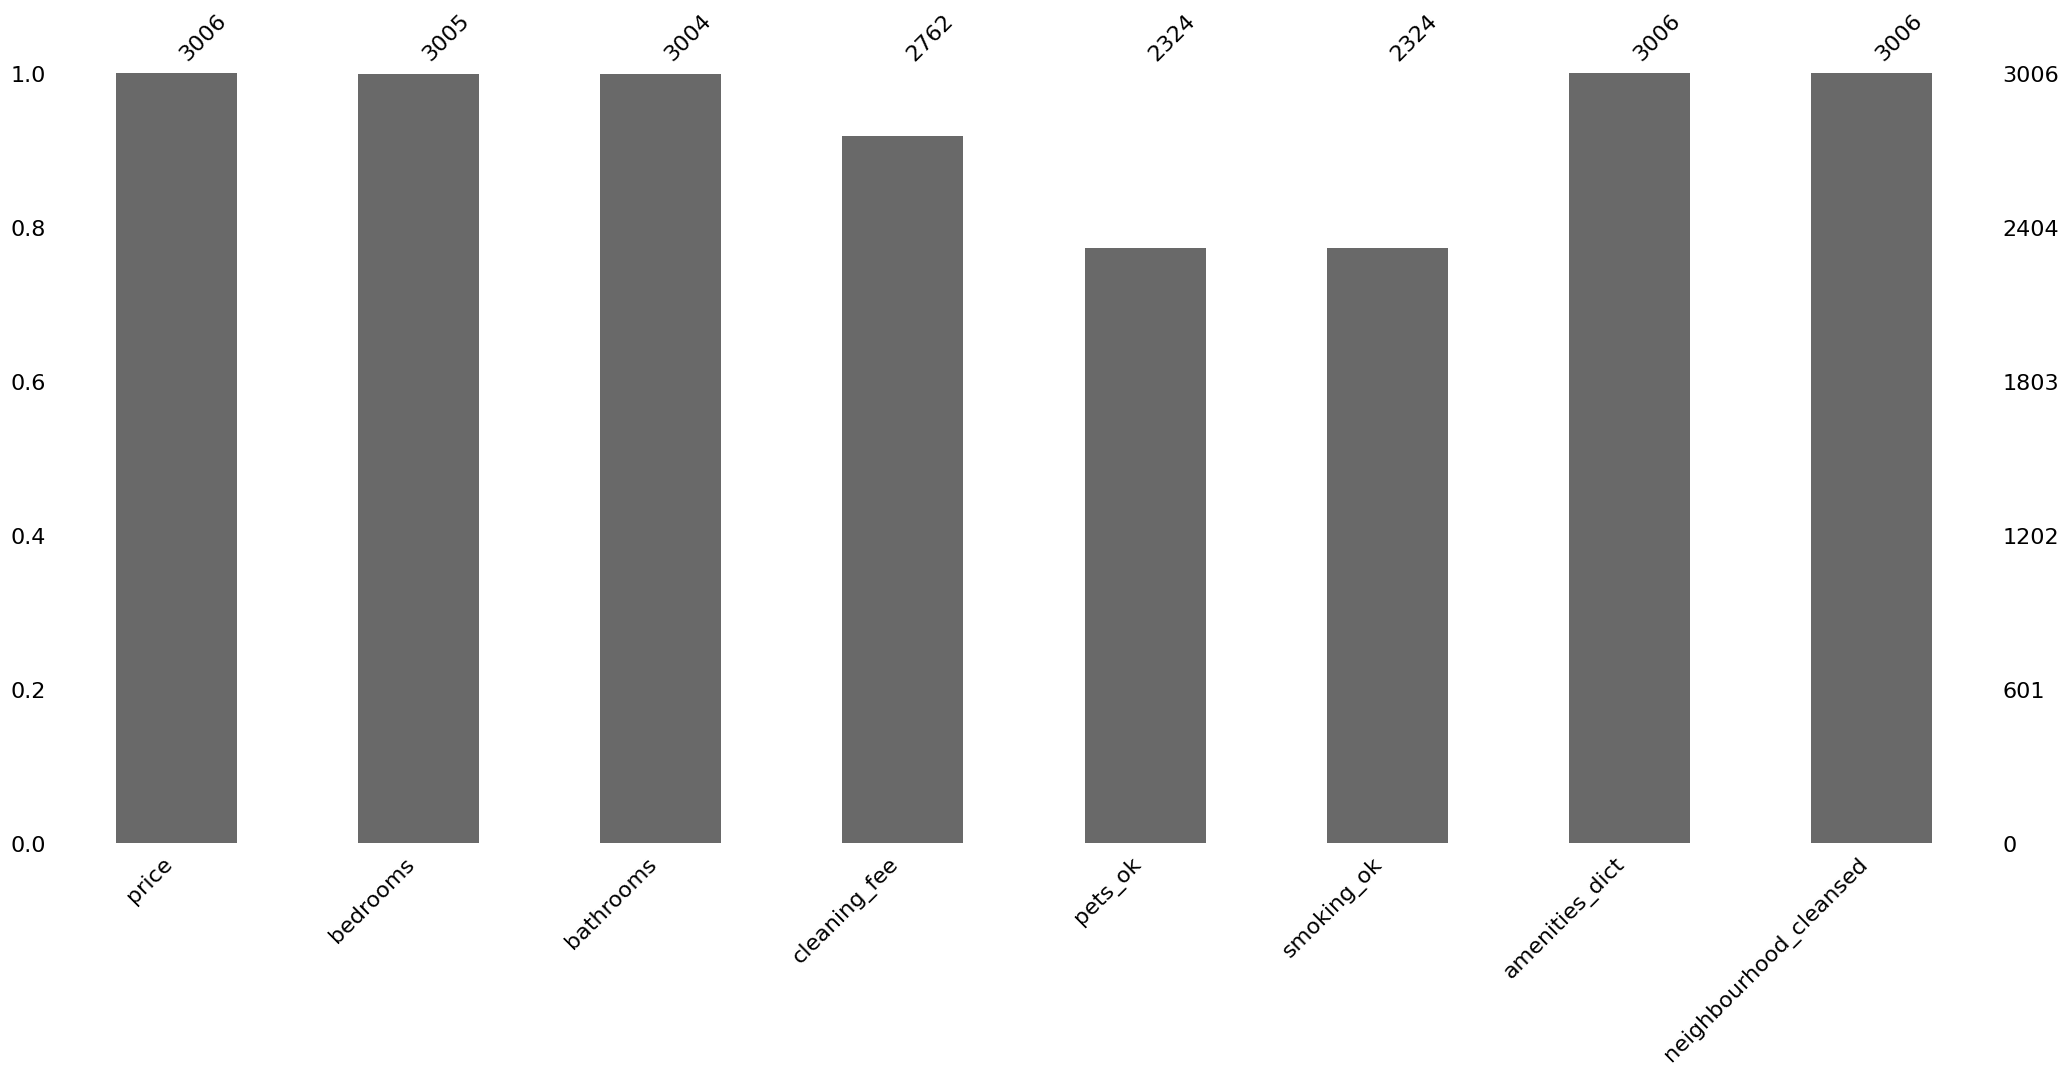

In [6]:
target = 'review_scores_rating'

# determine which columns we will use as features (inputs) in the model
features = [
    'price',
    'bedrooms',
    'bathrooms',
    'cleaning_fee',
    'pets_ok',
    'smoking_ok',
    'amenities_dict',
    'neighbourhood_cleansed',
]
numeric_features = ['price', 'bedrooms', 'bathrooms', 'cleaning_fee', 'pets_ok', 'smoking_ok']  # which features are already numeric
mask = df[target].notnull() # find columns where target is NOT missing
F = df.loc[mask, features]  # feature dataframe of feature columns and rows where target is not missing
y = df.loc[mask, target]    # target dataframe of target column and rows where target is not missing
msno.bar(F)

amenities_dict looks important - it indicates which amenities the property offers.  However, it has been stored in a rather awkward format.  Let's extract it as indicator (dummy) variables.

In [7]:
# extract amenities into indicator columns
A = F['amenities_dict'].str.split(', ', expand=True)  # split pieces of amentities string into separate columns
disp(A)

amenities_features = A.columns = [x.split(':')[0].strip("'") for x in A.iloc[0]]  # get columns names from row 0
A.columns = amenities_features
disp(A)

def amentity_offered(x):
    return (x.str[-1] == '1').astype('boolean')  # return True if the final character is 1
A = A.apply(amentity_offered)
disp(A)

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,'tv': 1,'cable tv': 1,'wifi': 1,'air conditioning': 1,'kitchen': 1,'free parking on premises': 1,'free street parking': 1,'heating': 1,'washer': 1,'dryer': 1,...,'bath towel': 0,'toilet paper': 0,'safe': 0,'bedroom comforts': 0,'bathroom essentials': 0,'game room': 0,'luggage storage': 0,'front desk': 0,'self parking': 0,'concierge': 0
1,'tv': 1,'cable tv': 1,'wifi': 1,'air conditioning': 1,'kitchen': 0,'free parking on premises': 0,'free street parking': 1,'heating': 1,'washer': 1,'dryer': 1,...,'bath towel': 0,'toilet paper': 0,'safe': 0,'bedroom comforts': 0,'bathroom essentials': 0,'game room': 0,'luggage storage': 0,'front desk': 0,'self parking': 0,'concierge': 0
2,'tv': 1,'cable tv': 1,'wifi': 1,'air conditioning': 1,'kitchen': 1,'free parking on premises': 0,'free street parking': 1,'heating': 1,'washer': 1,'dryer': 1,...,'bath towel': 0,'toilet paper': 0,'safe': 0,'bedroom comforts': 0,'bathroom essentials': 0,'game room': 0,'luggage storage': 0,'front desk': 0,'self parking': 0,'concierge': 0


,tv,cable tv,wifi,air conditioning,kitchen,free parking on premises,free street parking,heating,washer,dryer,...,bath towel,toilet paper,safe,bedroom comforts,bathroom essentials,game room,luggage storage,front desk,self parking,concierge
0,'tv': 1,'cable tv': 1,'wifi': 1,'air conditioning': 1,'kitchen': 1,'free parking on premises': 1,'free street parking': 1,'heating': 1,'washer': 1,'dryer': 1,...,'bath towel': 0,'toilet paper': 0,'safe': 0,'bedroom comforts': 0,'bathroom essentials': 0,'game room': 0,'luggage storage': 0,'front desk': 0,'self parking': 0,'concierge': 0
1,'tv': 1,'cable tv': 1,'wifi': 1,'air conditioning': 1,'kitchen': 0,'free parking on premises': 0,'free street parking': 1,'heating': 1,'washer': 1,'dryer': 1,...,'bath towel': 0,'toilet paper': 0,'safe': 0,'bedroom comforts': 0,'bathroom essentials': 0,'game room': 0,'luggage storage': 0,'front desk': 0,'self parking': 0,'concierge': 0
2,'tv': 1,'cable tv': 1,'wifi': 1,'air conditioning': 1,'kitchen': 1,'free parking on premises': 0,'free street parking': 1,'heating': 1,'washer': 1,'dryer': 1,...,'bath towel': 0,'toilet paper': 0,'safe': 0,'bedroom comforts': 0,'bathroom essentials': 0,'game room': 0,'luggage storage': 0,'front desk': 0,'self parking': 0,'concierge': 0


,tv,cable tv,wifi,air conditioning,kitchen,free parking on premises,free street parking,heating,washer,dryer,...,bath towel,toilet paper,safe,bedroom comforts,bathroom essentials,game room,luggage storage,front desk,self parking,concierge
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


Neighborhood might also be important. Most machine learners can't handle categorical variables like this directly, but we can "one-hot-encode" into indicator (dummy) variables.  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)  # create one-hot encoder object
N = enc.fit_transform(F[['neighbourhood_cleansed']]).astype('boolean')  # apply object to neighborhood_cleansed column
disp(N)

# we don't need the "neighborhood_cleansed_" prefix here, so let's remove it by keeping only charaters 23 and beyond
neighorhoods_features = N.columns.str[23:]
N.columns = neighorhoods_features
disp(N)

,neighbourhood_cleansed_allston,neighbourhood_cleansed_back bay,neighbourhood_cleansed_bay village,neighbourhood_cleansed_beacon hill,neighbourhood_cleansed_brighton,neighbourhood_cleansed_charlestown,neighbourhood_cleansed_chinatown,neighbourhood_cleansed_dorchester,neighbourhood_cleansed_downtown,neighbourhood_cleansed_east boston,...,neighbourhood_cleansed_mattapan,neighbourhood_cleansed_mission hill,neighbourhood_cleansed_north end,neighbourhood_cleansed_roslindale,neighbourhood_cleansed_roxbury,neighbourhood_cleansed_south boston,neighbourhood_cleansed_south boston waterfront,neighbourhood_cleansed_south end,neighbourhood_cleansed_west end,neighbourhood_cleansed_west roxbury
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


,allston,back bay,bay village,beacon hill,brighton,charlestown,chinatown,dorchester,downtown,east boston,...,mattapan,mission hill,north end,roslindale,roxbury,south boston,south boston waterfront,south end,west end,west roxbury
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [9]:
# join and drop the original columns
X = F.join(N).join(A).drop(columns=['amenities_dict', 'neighbourhood_cleansed'])
disp(X)

display(X.describe(include='all'))

,price,bedrooms,bathrooms,cleaning_fee,pets_ok,smoking_ok,allston,back bay,bay village,beacon hill,...,bath towel,toilet paper,safe,bedroom comforts,bathroom essentials,game room,luggage storage,front desk,self parking,concierge
0,125.0,1,1.0,75,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,145.0,1,1.0,60,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,169.0,1,1.0,80,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,price,bedrooms,bathrooms,cleaning_fee,pets_ok,smoking_ok,allston,back bay,bay village,beacon hill,...,bath towel,toilet paper,safe,bedroom comforts,bathroom essentials,game room,luggage storage,front desk,self parking,concierge
count,3006.000000,3005.0,3004.0,2762.0,2324,2324,3006,3006,3006,3006,...,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006
unique,NaN,<NA>,<NA>,<NA>,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
top,NaN,<NA>,<NA>,<NA>,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,<NA>,<NA>,<NA>,1982,1334,2839,2825,2945,2895,...,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006
mean,177.923486,1.321464,1.274467,71.356626,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,376.842072,0.968455,0.515479,57.028729,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,80.000000,1.0,1.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,133.000000,1.0,1.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,199.000000,2.0,1.5,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We are done with data wrangling.  Let's compact this code into one cell for convenience.

In [1]:
import pathlib, numpy as np, pandas as pd, sklearn, missingno as msno
from sklearn.preprocessing import OneHotEncoder
from google.colab import data_table
data_table.enable_dataframe_formatter()
from sklearn import set_config
set_config(transform_output = "pandas")
def disp(X):
    display(X.head(3))

path = pathlib.Path("/content/drive/MyDrive/CEE_workshop")
file = path / "airbnb.csv"
df = pd.read_csv(file).convert_dtypes().set_index('id')

for col in df.columns:
    try:
        df[col] = df[col].str.lower()
    except AttributeError:
        pass
df['price'] = df['price'].str.replace(',','').astype(float)
df['pets_ok'] = ~df['house_rules'].str.contains('no pets')
df['smoking_ok'] = ~df['house_rules'].str.contains('smok')

target = 'review_scores_rating'
features         = ['price', 'bedrooms', 'bathrooms', 'cleaning_fee', 'pets_ok', 'smoking_ok', 'amenities_dict', 'neighbourhood_cleansed']
numeric_features = ['price', 'bedrooms', 'bathrooms', 'cleaning_fee', 'pets_ok', 'smoking_ok']
mask = df[target].notnull()
F = df.loc[mask, features]
y = df.loc[mask, target]

A = F['amenities_dict'].str.split(', ', expand=True)
amenities_features = A.columns = [x.split(':')[0].strip("'") for x in A.iloc[0]]
A.columns = amenities_features
def amentity_offered(x):
    return (x.str[-1] == '1').astype('boolean')
A = A.apply(amentity_offered)

enc = OneHotEncoder(sparse_output=False)
N = enc.fit_transform(F[['neighbourhood_cleansed']]).astype('boolean')
neighorhoods_features = N.columns.str[23:]
N.columns = neighorhoods_features

X = F.join(N).join(A).drop(columns=['amenities_dict', 'neighbourhood_cleansed'])

Now we can start building a model

In [15]:
# https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler#, QuantileTransformer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor

numeric_prep = Pipeline(steps = [('scaler', MinMaxScaler())])

amenities_prep = Pipeline(steps = [('pca', PCA())])

combined_prep = ColumnTransformer(transformers = [('numeric', numeric_prep, numeric_features), ('amenities', amenities_prep, amenities_features)])

prep = Pipeline(steps = [('combined', combined_prep), ('imputer', KNNImputer())])

estimator = Pipeline(steps = [('prep', prep), ('regressor', KNeighborsRegressor())])
estimator

Pipeline(steps=[('prep',
                 Pipeline(steps=[('combined',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('scaler',
                                                                                    MinMaxScaler())]),
                                                                   ['price',
                                                                    'bedrooms',
                                                                    'bathrooms',
                                                                    'cleaning_fee',
                                                                    'pets_ok',
                                                                    'smoking_ok']),
                                                                  ('amenities',
                                                                   Pipeline(steps=[('pca',
                                                                                    PCA())]),
                                                                   ['tv',
                                                                    'cable tv',
                                                                    'wifi',
                                                                    'air '
                                                                    'conditioning',
                                                                    'kitchen',
                                                                    'free '
                                                                    'parking '
                                                                    'on '
                                                                    'premises',
                                                                    'free '
                                                                    'stre...
                                                                    'essentials',
                                                                    'shampoo',
                                                                    '24-hour '
                                                                    'check-in',
                                                                    'hangers',
                                                                    'hair '
                                                                    'dryer',
                                                                    'iron',
                                                                    'laptop '
                                                                    'friendly '
                                                                    'workspace',
                                                                    'hot water',
                                                                    'bed '
                                                                    'linens',
                                                                    'extra '
                                                                    'pillows '
                                                                    'and '
                                                                    'blankets',
                                                                    'microwave',
                                                                    'coffee '
                                                                    'maker',
                                                                    'refrigerator',
                                                                    'dishwasher',
                                                                    'dishes '
                                                                    'and '
       

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
hyperparameters = {
    'regressor__n_neighbors': [5,7,9],
    'prep__combined__amenities__pca__n_components': [5,10],
}

model = GridSearchCV(estimator, hyperparameters, cv=5, scoring='r2')
model.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        Pipeline(steps=[('combined',
                                                         ColumnTransformer(transformers=[('numeric',
                                                                                          Pipeline(steps=[('scaler',
                                                                                                           MinMaxScaler())]),
                                                                                          ['price',
                                                                                           'bedrooms',
                                                                                           'bathrooms',
                                                                                           'cleaning_fee',
                                                                                           'pets_ok',
                                                                                           'smoking_ok']),
                                                                                         ('amenities',
                                                                                          Pipeline(steps=[('pca',
                                                                                                           PCA())]),
                                                                                          ['tv',
                                                                                           'cable '
                                                                                           'tv',
                                                                                           'wifi',
                                                                                           'air '
                                                                                           'conditioning',
                                                                                           'kitchen',
                                                                                           'free '
                                                                                           'park...
                                                                                           'dryer',
                                                                                           'iron',
                                                                                           'laptop '
                                                                                           'friendly '
                                                                                           'workspace',
                                                                                           'hot '
                                                                                           'water',
                                                                                           'bed '
                                                                                           'linens',
                                                                                           'extra '
                                                                                           'pillows '
                                                                                           'and '
                                                                                           'blankets',
                                                                                           'microwave',
                                                                                           'coffee '
                                                                                           'maker',
                                                    

In [34]:
model.best_score_, model.score(X, y)

(-0.054770540412449976, 0.2651355886710247)

In [11]:
result = pd.DataFrame()
result['true'] = y
result['pred'] = model.predict(X)
result['err'] = result['true'] - result['pred']